### Which Neighborhoods have the most access to bus stops?

## *By Devin Gilson*

Dataset: https://data.wprdc.org/dataset/prt-of-allegheny-county-transit-stops

As a fellow college student, who is broke, our access to free and somewhat reliable transportation is an important factor for our housing. The purpose of this section is to compile a map that serves as some sort of frequency map. That allows the user to quicly cross reference potential housing with the number of nearby stops.


Here I import my dependcies for my section:

In [15]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import contextily as cx
import shapely
import plotly.express as px


This is where I summon the relevant files:
- The first command is for manipulation
- The second is there to output my dataframe

In [7]:
df = pd.read_csv("busstopusagebyroute.csv")
stops = gpd.read_file('busstopusagebyroute.csv')

Below is the csv file I will be using today that contains Pittsburgh's bus data:

In [34]:
stops.head()

,STOP_ID,ROUTE,STOP_ROUTE,STOP_NAME,CLEVER_ID,LATITUDE,LONGITUDE,ALL_ROUTES,SHELTER,STOP_TYPE,...,1806_OFF,1809_ON,1809_OFF,1811_ON,1811_OFF,1903_ON,1903_OFF,1906_ON,1906_OFF,geometry
0,P03090,P1,P03090_P1,SMITHFIELD ST AT SIXTH AVE,7280.0,40.441550,-79.997761,"39, 40, 44, 87, P1, P2, P68, P71",Envision Downtown,Bus,...,1706.2,3534.3,1800.3,3117.1,1541.7,3434.1,1809.6,3615.6,1829.3,POINT (-79.99776 40.44155)
1,P02325,P1,P02325_P1,LIBERTY AVE AT 10TH ST,7279.0,40.443739,-79.995153,"39, 40, 44, 87, P1, P2, P68, P71",Envision Downtown,Bus,...,2300.3,994.7,2429.7,882.7,2234.2,892.4,2269.3,719.5,2050.9,POINT (-79.99515 40.44374)
2,P03360,38,P03360_38,STANWIX ST AT FORBES AVE,44.0,40.440989,-80.003966,"36, 38",No Shelter,Bus,...,904.9,1287.7,880.8,1235.1,764.1,1218.2,805.9,1169.9,783.6,POINT (-80.00397 40.44099)
3,P00930,16,P00930_16,7TH ST AT PENN AVE,20182.0,40.443298,-80.000402,"13, 16, 17",No Shelter,Bus,...,1158.2,779.1,1222.1,714.9,1105.7,718.7,1133.2,680.3,1081.8,POINT (-80.00040 40.44330)
4,P02550,91,P02550_91,LIBERTY AVE AT WOOD ST,46.0,40.442401,-79.999575,"28X, 77, 86, 88, 91",No Shelter,Bus,...,451.5,1398.9,462.8,1306.7,433.3,1288.4,419.4,1243.1,389.5,POINT (-79.99957 40.44240)


In this section, I focus on the longitude and latitude portion of the csv file as this grants the location of bus stops:

In [8]:
geometry = [Point(xy) for xy in zip(df['LONGITUDE'],df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry = geometry)

Below, I set up the paramaters for my bare data points that will be placed onto a map using:

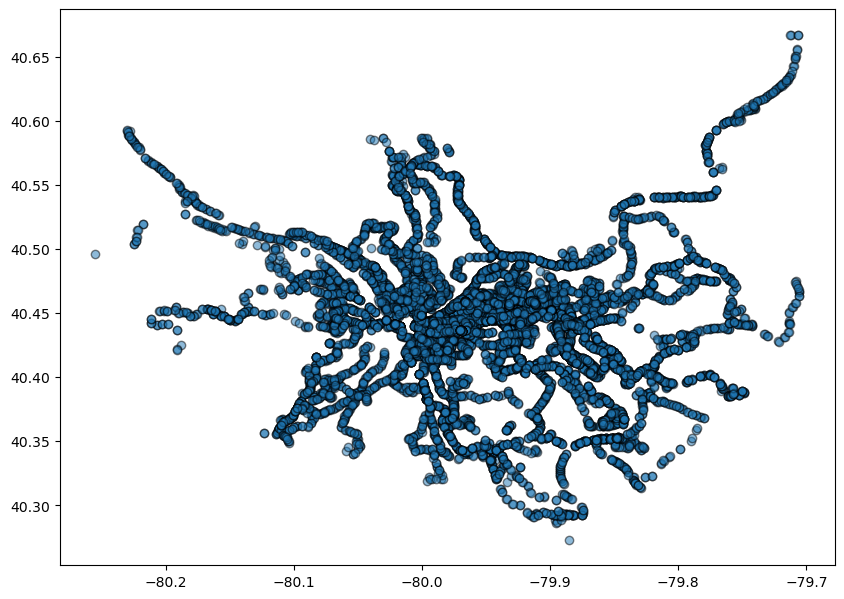

In [56]:

x = gdf.plot(figsize=(10,10), alpha =.5, edgecolor = 'k')
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite,zoom = 20)

The below cell is the start of setting up a map that contains the points above for an easier understanding. As of now, it is broken.

In [54]:

color_scale = [(0,'orange'),(1,'red')]

figure = px.scatter_mapbox(stops, lat='LATITUDE', lon = 'LONGITUDE', hover_name= 'STOP_NAME', hover_data= 'STOP_NAME', zoom = 8, height = 800, width = 800,)

figure.update_layout(mapbox_style="open-street-map")
figure.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
figure.show()

NameError: name 'px' is not defined

# In Conclusion,

In terms of best neighborhood for transportation its going to be those that are closest to the Lat: 40.441 and lon: -79.996 or the DownTown District. Which suggests that students who value transportation in Pittsburgh, should seek apartment stile housing near the Steel plaza